# Dosimetry Film Analysis

Instructions given in text, explanations given in comments. Only first three boxes should need adjusted.

In [142]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

#### Copy file path from computer (provided in file explorer in top left). Be sure to add 'r' in front of the filepath.

   Example:     filepath = r"C:\Users\jdoe\Documents\1.pdf"

In [158]:
filepath = r"C:\Users\akittel\Documents\Reactor\Linac Beam\film scans\10cm 2.png"

#### Use proper calibration value and comment out other values.

In [159]:
#10cm cal
cal = 227.68

#15cm cal
#cal = 232.54

#20cm cal
#cal = 219.34

#### Edit title for final plot.

In [164]:
title = '10cm 002'

In [161]:
# Opens image, prints pixel dimentions of image and saves values to xlength and ylength.
im = Image.open(filepath)
px = im.load()
print(im.size)
xlength,ylength = im.size

# Creates dataframe with columns x, y, gray value (pixel), optical density, and dose per pulse.
df = pd.DataFrame(columns=['x','y','gray','od','dpp'])

(200, 193)


In [162]:
# Populates the dataframe with information for each individual pixel. 
    # CAUTION: a 200x200 pixel image takes roughly one minute to process. Avoid large images or resize.
for j in range(ylength):
    for i in range(xlength):
        coordinate = i,j
        gray = im.getpixel(coordinate)
        od = math.log10(cal/gray)
        dpp = 1000*(1614*(od**2.01))/12000
        new = [i,j,gray,od,dpp]
        df.loc[len(df)] = new
        
# Had issues with complex numbers- used df.abs to eliminate issue. 
df = df.abs()

# Finds the max dose per pulse in the film.
max = df.dpp.max()

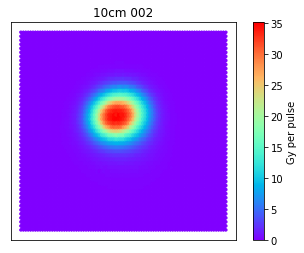

Maximum Dose Per Pulse: 35.05432224126484


In [165]:
# Generates plot using pixel location and the dose per pulse at each location.
    # NOTE: y is negative due to python imaging library's coordinate system- (0,0) is top left, 
    # so to plot properly the y data needs to be negative, making (0,0) in the upper left corner.
fig,ax = plt.subplots()
z = df.dpp
x = df.x
y = -df.y

# Makes a 2d histogram where x and y are locations, and rather than the color being bin population,
# the color is based on the 'z' value given. Plot uses hexagonal bins, so the 'gridsize' value is the 
# number of hexagonal bins across the plot. 
hist = ax.hexbin(x,y,z,cmap='rainbow',gridsize=85)
ax.set_aspect('equal',adjustable='box')
plt.title(title)

# Axes are unimportant unless x and y data is converted to cm rather than pixels.
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Colorbar max and min can be set using set_clim.
fig.colorbar(hist,label='Gy per pulse')
hist.set_clim(0,max)

# Show plot and maximum dose per pulse.
plt.show()
print('Maximum Dose Per Pulse:', max)
